# Image processing


In [1]:
import matplotlib.pyplot as plt
from skimage import data, io, filters
image = data.coins() # or any NumPy array!
io.imshow(image)
plt.axis('off')

(-0.5, 383.5, 302.5, -0.5)

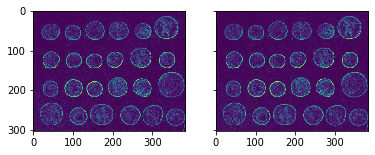

In [2]:
edges_scharr = filters.scharr(image)
edges_sobel = filters.sobel(image)
fig, ax = plt.subplots(1,2, sharey=True)
ax[0].imshow(edges_scharr)
ax[1].imshow(edges_sobel)
plt.show()

(95, 300)


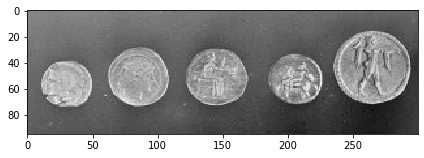

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Load a small section of the image.
image = data.coins()[0:95, 70:370]
io.imshow(image)
print(image.shape)

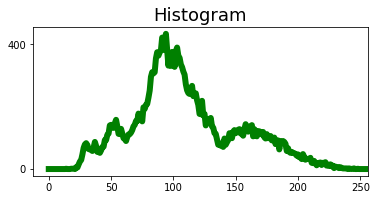

In [4]:
# Histogram.
values, bins = np.histogram(image, bins=np.arange(256))

fig, ax1 = plt.subplots()
ax1.plot(bins[:-1], values, lw=6, c='g')
ax1.set_xlim(right=256)
ax1.set_yticks([0, 400])
ax1.set_aspect(.25)
ax1.set_title('Histogram', fontsize=18)
plt.show()

(-0.5, 299.5, 94.5, -0.5)

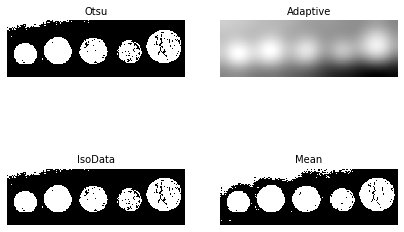

In [5]:
# Apply threshold.
from skimage.filters import threshold_otsu, threshold_isodata, threshold_mean, threshold_local
threshold = 95
offset = -15

bw0 = threshold_mean(image)
binary_global_mean = image > bw0
bw1 = threshold_otsu(image)
binary_global_otsu = image > bw1
bw2 = threshold_isodata(image)
binary_global_isodata = image > bw2
bw4 = threshold_local(image, 95, offset=-15)
fig, ax2= plt.subplots(2,2, figsize=(7, 5))

#Para Adaptive
ax2[0,1].imshow(bw4, cmap=plt.cm.gray)
ax2[0,1].set_title('Adaptive', fontsize=10)
ax2[0,1].axis('off')

#Para Otsu
ax2[0,0].imshow(binary_global_otsu, cmap=plt.cm.gray)
ax2[0,0].set_title('Otsu', fontsize=10)
ax2[0,0].axis('off')

#Para Mean
ax2[1,1].imshow(binary_global_mean, cmap=plt.cm.gray)
ax2[1,1].set_title('Mean', fontsize=10)
ax2[1,1].axis('off')

#Para Isodata
ax2[1,0].imshow(binary_global_isodata, cmap=plt.cm.gray)
ax2[1,0].set_title('IsoData', fontsize=10)
ax2[1,0].axis('off')


(-0.5, 299.5, 94.5, -0.5)

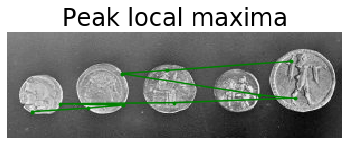

In [6]:
# Find maxima.
from skimage.feature import peak_local_max
coordinates = peak_local_max(image, min_distance=20)
fig, ax3 = plt.subplots()
ax3.imshow(image, cmap=plt.cm.gray)
ax3.autoscale(False)
ax3.plot(coordinates[:, 1], coordinates[:, 0], c='g', marker='.')
ax3.set_title('Peak local maxima', fontsize=24)
ax3.axis('off')

(-0.5, 299.5, 94.5, -0.5)

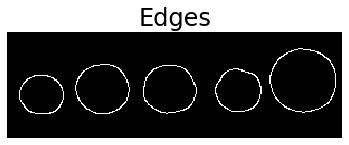

In [7]:
# Detect edges.
from skimage.feature import canny
fig, ax4 = plt.subplots()
edges = canny(image, sigma=3,low_threshold=10,high_threshold=80)
ax4.imshow(edges, cmap=plt.cm.gray)
ax4.set_title('Edges', fontsize=24)
ax4.axis('off')

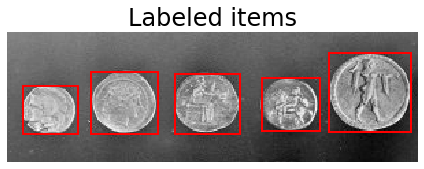

In [8]:
# Label image regions.
from skimage.measure import regionprops
import matplotlib.patches as mpatches
from skimage.morphology import label
label_image = label(edges)
fig, ax5 = plt.subplots()
ax5.imshow(image, cmap=plt.cm.gray)
ax5.set_title('Labeled items', fontsize=24)
ax5.axis('off')
for region in regionprops(label_image):
    # Draw rectangle around segmented coins.
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr),
    maxc - minc,
    maxr - minr,
    fill=False,
    edgecolor='red',
    linewidth=2)
    ax5.add_patch(rect)
plt.tight_layout()
plt.show()

## Ejercicio Práctico 

1. Escoja una foto suya con una o más personas.
2. Carge la foto al sistema con el comando img = io.imread('/path/to/example.jpg') previa importación de la librería io
3. Realice el histograma de la imagen que cargó 

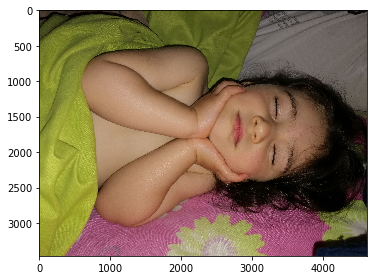

In [9]:
Ivy = io.imread("Ivy.jpg")
io.imshow(Ivy)
plt.show()

In [10]:
Ivy.shape

(3464, 4618, 3)

Text(0.5, 1.0, 'Sobel filter')

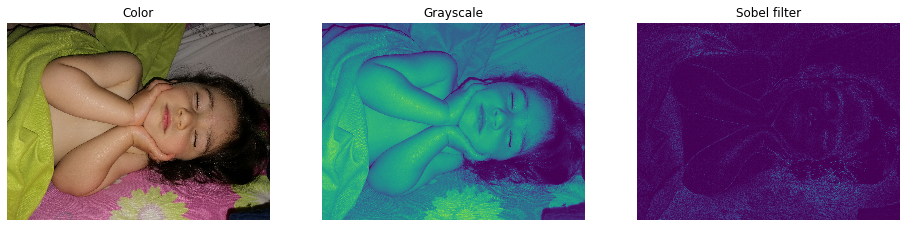

In [11]:
from skimage.color import rgb2gray
Ivy_gray = rgb2gray(Ivy)
Ivy_edge = filters.sobel(Ivy_gray)
fig, ax = plt.subplots(1,3, figsize=(16,6))
ax[0].imshow(Ivy)
ax[0].axis('off')
ax[0].set_title("Color")
ax[1].imshow(Ivy_gray)
ax[1].axis('off')
ax[1].set_title("Grayscale")
ax[2].imshow(Ivy_edge)
ax[2].axis('off')
ax[2].set_title("Sobel filter")

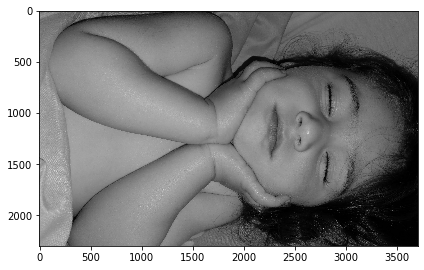

In [12]:
Ivy_reduce = Ivy_gray[500:2800, 500:4200]
io.imshow(Ivy_reduce)
plt.show()

In [13]:
# Histogram.
values, bins = np.histogram(Ivy_reduce*256, bins=np.arange(256))
values

array([ 78999, 116884,  51443,  89769,  67100,  57307,  57408,  50525,
        46639,  44615,  42914,  38017,  34440,  32084,  29291,  27132,
        24951,  22829,  21290,  19116,  18238,  17073,  15308,  15019,
        14301,  13790,  12925,  12691,  12232,  12048,  11484,  11626,
        11490,  11225,  11256,  11412,  11427,  11347,  11586,  11787,
        12152,  12055,  12240,  12861,  12927,  13437,  13640,  13792,
        13594,  14033,  13709,  14267,  14134,  14484,  14721,  15143,
        15185,  14877,  15668,  16007,  16786,  17157,  18025,  18400,
        19141,  19539,  20269,  21076,  21970,  22649,  22653,  23102,
        23750,  24462,  25323,  26281,  27044,  28023,  29282,  30185,
        31261,  32503,  34222,  36314,  38451,  42287,  44344,  44969,
        46981,  46634,  46908,  50513,  51739,  51286,  54323,  54469,
        55942,  58116,  61653,  62612,  67613,  70380,  76547,  83280,
        86831,  91792,  93349,  89762,  85495,  79002,  71648,  68569,
      

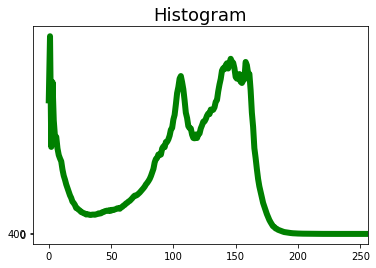

In [14]:
fig, ax1 = plt.subplots()
ax1.plot(bins[:-1], values, lw=6, c='g')
ax1.set_xlim(right=256)
ax1.set_yticks([0, 400])
#ax1.set_aspect(.25)
ax1.set_title('Histogram', fontsize=18)
plt.show()

(-0.5, 4617.5, 3463.5, -0.5)

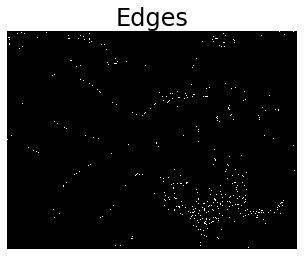

In [15]:
# Detect edges.
fig, ax4 = plt.subplots()
edges_Ivy = canny(Ivy_gray, sigma=2)
ax4.imshow(edges_Ivy, cmap=plt.cm.gray)
ax4.set_title('Edges', fontsize=24)
ax4.axis('off')

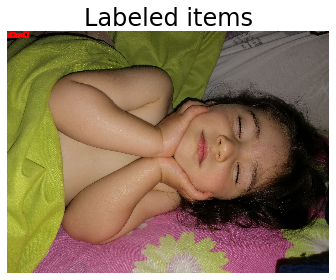

In [16]:
label_image_Ivy = label(edges_Ivy)
fig, ax5 = plt.subplots()
ax5.imshow(Ivy, cmap=plt.cm.gray)
ax5.set_title('Labeled items', fontsize=24)
ax5.axis('off')
for region in regionprops(label_image):
    # Draw rectangle around segmented coins.
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr),
    maxc - minc,
    maxr - minr,
    fill=False,
    edgecolor='red',
    linewidth=2)
    ax5.add_patch(rect)
plt.tight_layout()
plt.show()

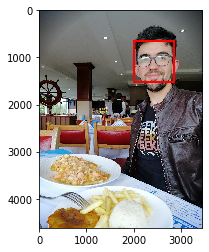

In [25]:
from skimage import data
from skimage.feature import Cascade

import matplotlib.pyplot as plt
from matplotlib import patches

# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

img = io.imread('me.jpg')
#img=Ivy_gray
detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.1,
                                       step_ratio=1,
                                       min_size=(500, 500),
                                       max_size=(1000, 1000))

plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()